# Laptop Prices Prediction

![](https://cdn.thewirecutter.com/wp-content/uploads/2020/04/laptops-lowres-2x1--1024x512.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing Libraries and Dataset
5. Data Visualization
6. Label Encoding
    - Encoding
    - Scalling
7. Prediction Models
    - Spliting the dataset into 75:25 ratio
    - Deploying the models
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression
        - Lasso Regression
        - Ridge Regression
        - MLP Regression
        - XgBoost Regression
        - Gradient Boosting Regression
        - Support Vector Regression
8. Comparing the accuracy of the models
9. Conclusion

### Abstract
Artificial Intelligence is an integral part of all major e-commerce companies today. With the evolution of the information industry and extensive research in the field of AI in the past two decades, businesses have started to explore the ways to automate various activities using state of the art Machine Learning algorithms and Deep Neural Networks. Many IT giants and start-ups have already taken a big leap in this field and have dedicated teams and resources for research and development of cutting edge AI applications. Online retail platforms today are extensively driven by AI-powered algorithms and applications. Activities ranging from inventory management and quality checking at the warehouse to product recommendation and sales demographics on the website, all employ machine learning at various scales.

### Dataset
The dataset which is used here, is collected from Kaggle website. Here is the link of the dataset : https://www.kaggle.com/ionaskel/laptop-prices.


### Goal
The goal of this project is to make a Prediction model which will predict the prices of the laptops depending on various factors, such as size, company, set up and many more things!
***********************************

### Importing all the required libraries and dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('laptops.csv',encoding='latin-1')

In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

**Correlation finder!**

In [5]:
df.corr()

,Unnamed: 0,Inches,Price_euros
Unnamed: 0,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
data_num = df.select_dtypes(include = ["int64", "float64"])
data_num.columns.tolist()

['Unnamed: 0', 'Inches', 'Price_euros']

***************
## Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

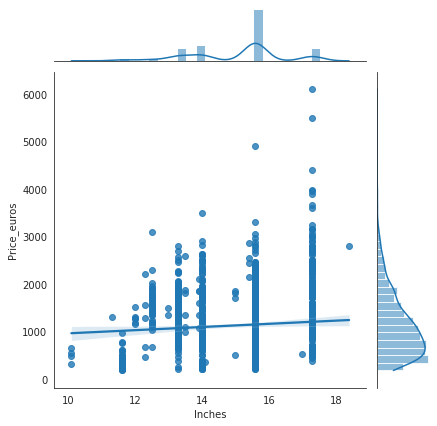

In [8]:
import seaborn as sns
with sns.axes_style("white"):
    sns.jointplot(x='Inches', y='Price_euros', data= data_num, kind = "reg")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B52FAC8>,
      dtype=object)

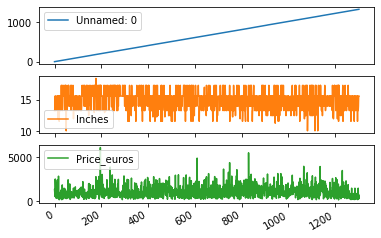

In [9]:
import matplotlib.pyplot as plt
data_num.plot(subplots=True)

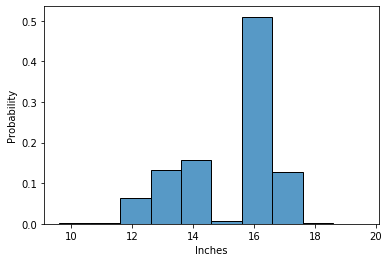

In [10]:
sns.histplot(data=data_num, x="Inches", stat="probability", discrete=True)

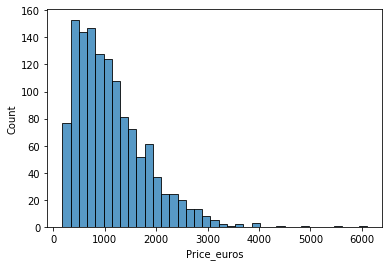

In [11]:
sns.histplot(data = df, x= "Price_euros")

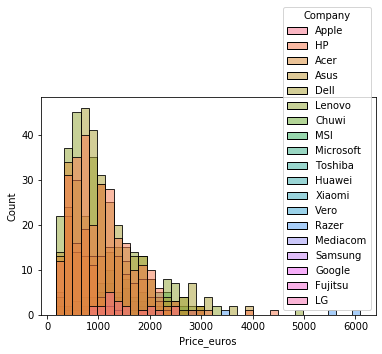

In [13]:
sns.histplot(x = "Price_euros", data = df, hue = "Company")

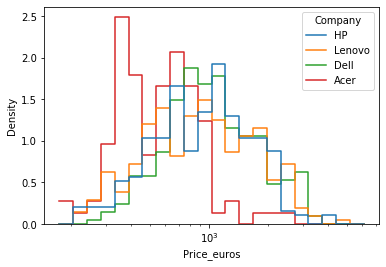

In [14]:
sns.histplot(data = df, x= "Price_euros",hue = "Company", hue_order = [ "HP","Lenovo", 'Dell',"Acer"],
            log_scale = True, element ="step", fill = False, stat = "density", common_norm = False)

In [15]:
df['Company'].value_counts()

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Google         3
Chuwi          3
LG             3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

In [16]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.9      6
13.5      6
12.0      6
12.3      5
15.4      4
10.1      4
15.0      4
13.0      2
18.4      1
14.1      1
17.0      1
11.3      1
Name: Inches, dtype: int64

In [17]:
df.drop(columns=['Unnamed: 0','Company','Inches','ScreenResolution','TypeName','Weight'],inplace=True)
df.head()

# these feature are unique and does nothing in our predictions, So, we drop it !!

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,MacBook Pro,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Macbook Air,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,250 G6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,MacBook Pro,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,MacBook Pro,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


In [18]:
df.reset_index(drop=True,inplace=True)

************************************
## Label Encoding
Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1303 non-null   object 
 1   Cpu          1303 non-null   object 
 2   Ram          1303 non-null   object 
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Price_euros  1303 non-null   float64
dtypes: float64(1), object(6)
memory usage: 71.4+ KB


In [20]:
col = [feature for feature in df.columns if df[feature].dtype == 'O']

# Using List comprehension for extracting categorical column names 

### Encoding

> Working of below code
* We are going to assign each and every value of a categorical feature to a no.
* This assignment of no.s will be done by how much it worths as target feature
* we are going to group dataset by feature.
* Then, we will take out mean of target feature('Price_euros') of the grouped data.
* Now, Sort the values and get the index.
* Now, make a dictionary, and assign index, to value 0 to n.
* So, Now we can actually get changes to our original dataset

In [21]:
for feature in col:
    labels_ordered= df.groupby([feature])['Price_euros'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [22]:
df.head()

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,559,85,3,13,80,8,1339.69
1,333,64,3,14,45,8,898.94
2,107,58,3,20,54,2,575.00
3,559,111,5,30,95,8,2537.45
4,559,99,3,20,84,8,1803.60


In [23]:
y = df['Price_euros']
X = df.drop(columns='Price_euros')

### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # setting with_mean False, is for a reason !

temp = scaler.fit_transform(X)
X = pd.DataFrame(temp)

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)

In [37]:
from sklearn import metrics

***************
##   Prediction Model Creation

Predictive modeling, also called predictive analytics, is a mathematical process that seeks to predict future events or outcomes by analyzing patterns that are likely to forecast future results.

Now to build that prediction model I amgoing to use regression algorithms. Now let's find out what is regression algorithms?

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with nine regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


* **Gradient Boosting Regressor** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


* **Support Vector Machine Regressor** : Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

Let's deploy the models...

### Simple Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
lr.score(X_train,y_train) # train-set score

0.8357155294189313

In [41]:
lr.score(X_test,y_test) # test-set score

0.7847431032252344

In [43]:
y_pred = lr.predict(X_test) # prediction 

In [44]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 195.8334243378515
Residual Sum of Squares(MSE): 114481.29339024161
R2-Score: 0.7847431032252344


### Random Forest Regression 
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)

In [46]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [47]:
rfr.score(X_train,y_train) # train-set score 

0.9852196558985368

In [48]:
rfr.score(X_test,y_test) # test-set score

0.9333575624283379

In [51]:
y_pred = rfr.predict(X_test) #prediction

In [52]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 103.11744676234296
Residual Sum of Squares(MSE): 35442.82465367537
R2-Score: 0.9333575624283379


### Decision Tree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_pred = dtr.predict(X_test)

In [54]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 144.58597648261758
Residual Sum of Squares(MSE): 66066.6249020876
R2-Score: 0.8757762405048259


### Lasso Regression
In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [55]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [56]:
y_pred = lasso.predict(X_test)

In [57]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 195.77804200831892
Residual Sum of Squares(MSE): 114489.55791420737
R2-Score: 0.7847275636053584


### Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [58]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [59]:
y_pred = ridge.predict(X_test)

In [60]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 195.82514137665925
Residual Sum of Squares(MSE): 114478.95688884085
R2-Score: 0.7847474965023012


### XgBoost Regressor 
XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


In [61]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[15:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [62]:
y_pred = xgb.predict(X_test)

In [63]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 104.78362462517673
Residual Sum of Squares(MSE): 38719.712632959745
R2-Score: 0.9271960951998464


### MLP Regressor 
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [65]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor()

In [66]:
y_pred = mlp.predict(X_test)

In [67]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 719.1823261374564
Residual Sum of Squares(MSE): 724225.6089143881
R2-Score: -0.36174699396796517


### Gradient Boosting Regressor 
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [69]:
y_pred = gb.predict(X_test)

In [70]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 103.51260653902484
Residual Sum of Squares(MSE): 34908.10337073394
R2-Score: 0.9343629882109854


### Support Vector Machine Regressor 
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.

In [71]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [72]:
y_pred = svm.predict(X_test)

In [73]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 423.5454581351365
Residual Sum of Squares(MSE): 457446.91016239516
R2-Score: 0.1398716820476137


------------------------
### Comparative analysis among the algorithms for this project

We have deployed nine machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|78.47%|
|Decision Tree Regressor|87.57%|
|Random Forest Regressor|93.33%|
|Lasso Regression|78.47%|
|Ridge Regression|78.47%|
|XgBoost Regressor|92.71%|
|MLP Regressor|-36.17%|
|Gradient Boosting Regressor|93.43%|
|Support Vector Regressor|13.98%|

*****************************
### Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Gradient Boosting Regression is having the upper hand in case of this dataset and after this, we can use  Random Forest Regressor, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Gradient Boosting
2. Random Forest Regressor
3. XgBoosting Regressor
4. Decision Tree Regressor
5. Lasso Regressor
6. Ridge Regressor
7. Linear Regression
8. Support Vector Regressor
9. MLP Regressor


Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!